In [137]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)


sns.set_style("darkgrid")
%matplotlib inline

In [138]:
inmates_data = pd.read_csv('daily-inmates-in-custody.csv')
inmates_data.head(8269)

,INMATEID,ADMITTED_DT,DISCHARGED_DT,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,INMATE_STATUS_CODE,SEALED,SRG_FLG,TOP_CHARGE,INFRACTION
0,20159382,2015-11-14T18:22:02,NaN,NaN,N,NaN,NaN,NaN,DE,N,N,NaN,N
1,20120917,2013-10-11T18:34:33,NaN,NaN,N,NaN,NaN,NaN,DE,N,N,NaN,N
2,20174220,2016-10-25T16:33:35,NaN,NaN,N,NaN,NaN,NaN,DE,N,N,NaN,N
3,20174619,2016-11-03T18:11:30,NaN,NaN,N,NaN,NaN,NaN,DE,N,N,NaN,N
4,20175929,2016-12-09T02:20:21,NaN,NaN,N,NaN,NaN,NaN,DE,N,N,NaN,N
5,20183299,2017-06-10T20:29:39,NaN,NaN,N,NaN,NaN,NaN,DE,N,N,NaN,N
6,20117451,2017-07-15T17:22:55,NaN,MAX,N,B,M,22.0,DEP,N,Y,110-125.25,Y
7,20168420,2016-06-09T16:35:00,NaN,MED,Y,B,F,57.0,DE,N,N,125.25,N
8,20155635,2017-07-06T19:27:52,NaN,MIN,Y,B,M,53.0,DE,N,N,120.05,N
9,168794,2016-04-05T13:47:55,NaN,MED,N,B,M,34.0,DE,N,N,120.10,N


In [139]:
inmates_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8269 entries, 0 to 8268
Data columns (total 13 columns):
INMATEID              8269 non-null int64
ADMITTED_DT           8269 non-null object
DISCHARGED_DT         0 non-null float64
CUSTODY_LEVEL         8139 non-null object
BRADH                 8269 non-null object
RACE                  8244 non-null object
GENDER                8244 non-null object
AGE                   8256 non-null float64
INMATE_STATUS_CODE    8269 non-null object
SEALED                8269 non-null object
SRG_FLG               8269 non-null object
TOP_CHARGE            7282 non-null object
INFRACTION            8269 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 839.9+ KB


In [140]:
thresh = int(inmates_data.shape[0] * 0.5)
inmates_data.dropna(axis=1, thresh=thresh, inplace=True)

In [141]:
inmates_data.drop(axis=1, columns=['INMATEID', 'SEALED'], inplace=True)

In [142]:
# Helper functions
def get_top_charge_info(row):
    if row is np.nan:
        return np.nan
    pattern = re.compile(r'(\d{3})')
    try:
        match = pattern.findall(row)[0]
    except IndexError:
        match = np.nan
    return match

def get_inmates_by(data, column):
    df = data.groupby(column).groups
    data = pd.DataFrame({
        column: list(df.keys()),
        'Inmates': list(len(val) for val in df.values())
    })
    return data

In [143]:
# All laws in New York's penal law must be expressed in numbers.
# The letters are for clarification.
# See http://ypdcrime.com/search.penal for more info.
inmates_data['TOP_CHARGE'] = inmates_data.TOP_CHARGE.apply(get_top_charge_info).astype('float64')

# Extracting the Year and Month of inmates' addmitance
inmates_data[['YEAR', 'MONTH']] = inmates_data.ADMITTED_DT.str.extract(r'(\d{4})-(\d{2})').astype('int64')

# Dropping admitted_dt
inmates_data.drop('ADMITTED_DT', axis=1, inplace=True)

# Filling minor NaN's
inmates_data.RACE.fillna('O', inplace=True)

In [144]:
# Coding the values inside the variables
# Don't know how they categorized the races
# if anyone could help me on that I'd be very grateful

inmates_data['BRADH'] = inmates_data.BRADH.map({'N': 'No', 'Y': 'Yes'})
inmates_data['GENDER'] = inmates_data.GENDER.map({'M': 'Male', 'F': 'Female'})
inmates_data['SRG_FLG'] = inmates_data.SRG_FLG.map({'N': 'No', 'Y': 'Yes'})
inmates_data['INFRACTION'] = inmates_data.INFRACTION.map({'N': 'No', 'Y': 'Yes'})

In [145]:
# Ordering the columns
ordered_columns = ['YEAR', 'MONTH'] + list(inmates_data.columns[:-2])
inmates_data = inmates_data[ordered_columns]

# Ordering the dataset
inmates_data.sort_values(by=['YEAR', 'MONTH'], inplace=True)

# Resetting the index
inmates_data.reset_index(drop=True, inplace=True)

In [146]:
inmates_data.head(8269)

,YEAR,MONTH,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,INMATE_STATUS_CODE,SRG_FLG,TOP_CHARGE,INFRACTION
0,1991,11,MIN,No,O,Male,66.0,DE,No,220.0,No
1,2012,6,MAX,Yes,B,Male,30.0,DE,No,125.0,No
2,2012,10,MAX,Yes,O,Male,31.0,DE,No,125.0,Yes
3,2012,10,NaN,No,O,Male,23.0,DE,No,240.0,No
4,2013,9,NaN,No,B,Male,39.0,DE,No,509.0,No
5,2013,10,NaN,No,O,NaN,NaN,DE,No,NaN,No
6,2013,10,MIN,Yes,B,Male,40.0,DPV,No,NaN,Yes
7,2013,10,NaN,No,W,Male,70.0,DE,No,NaN,No
8,2013,12,MIN,No,O,Male,49.0,DE,No,220.0,No
9,2014,2,NaN,No,B,Male,28.0,DE,No,190.0,No


Text(0,0.5,'Count')

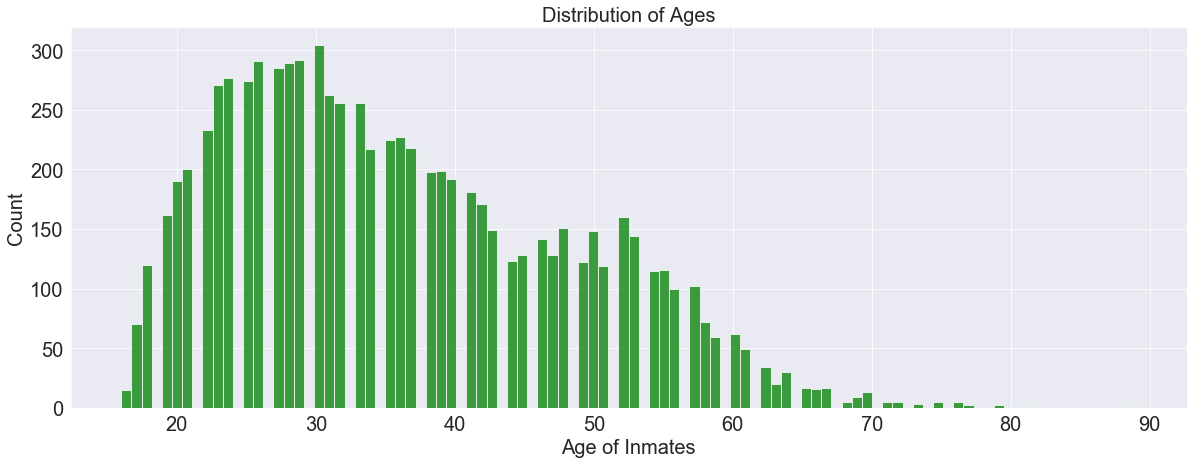

In [147]:
plt.figure(figsize=(20,7))
h = plt.hist(pd.to_numeric(inmates_data.AGE).dropna(), facecolor='g', alpha=0.75, bins=100)
plt.title("Distribution of Ages")
plt.xlabel("Age of Inmates")
plt.ylabel("Count")

In [148]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 3 else ''
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

Text(0.5,1,'GENDER DISTRIBUTION AMONG INMATES')

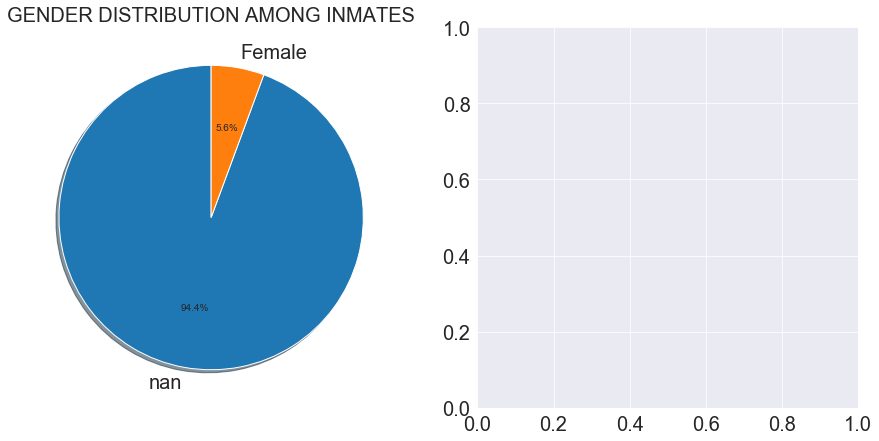

In [149]:
f, ax = plt.subplots(1,2, figsize=(15,7))
#sns.countplot(x='RACE', hue='GENDER', data=data, ax=ax[1][1], palette="Set2")
pie = ax[0].pie(list(inmates_data['GENDER'].value_counts()), 
                   labels=list(inmates_data.GENDER.unique())[1:],
                  autopct='%1.1f%%', shadow=True, startangle=90)

ax[0].set_title("GENDER DISTRIBUTION AMONG INMATES")

#ax[1][1].set_title("RACE - GENDER DISTRIBUTION")

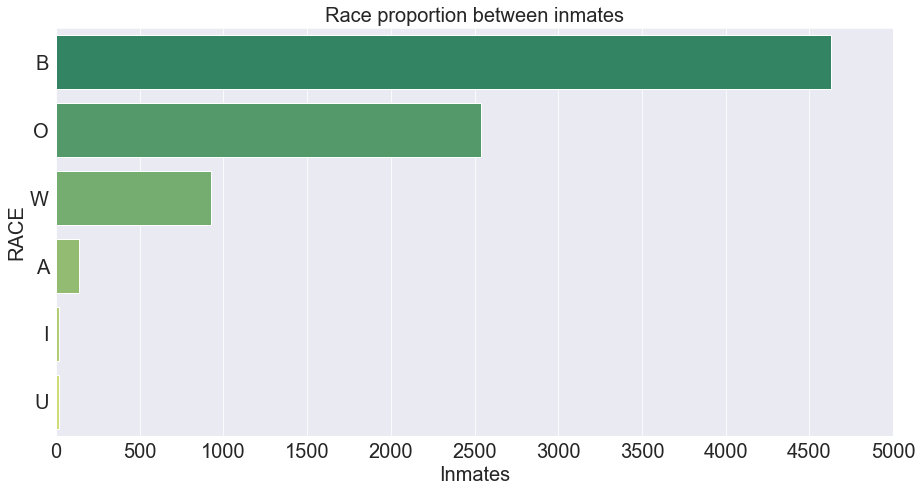

In [150]:
race_data = get_inmates_by(inmates_data, 'RACE')
race_data.sort_values('Inmates', ascending=False, inplace=True)
race_data = race_data.reset_index(drop=True)
figure, ax = plt.subplots(figsize=(15, 7.5))

sns.barplot('Inmates', 'RACE', data=race_data, palette='summer')
ax.set_title('Race proportion between inmates')
settings = ax.set(xlim=[0, 5000], xticks=[x * 500 for x in range(11)])

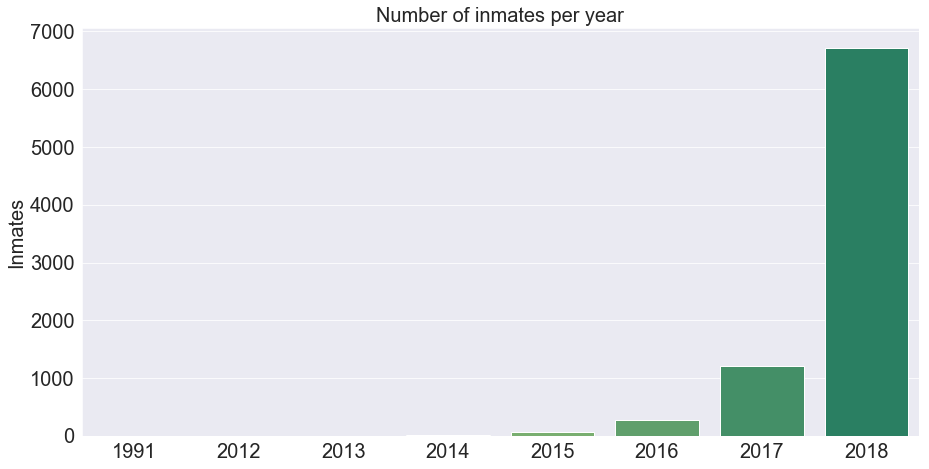

In [151]:
inmates_per_year = get_inmates_by(inmates_data, 'YEAR')

igure, ax = plt.subplots(figsize=(15, 7.5))

sns.barplot('YEAR', 'Inmates', data=inmates_per_year, palette='summer_r')
ax.set_title('Number of inmates per year')
text = ax.set(xlabel='')



Text(0.5,0,'Inmates under Mental Observation? Y-Yes, N-No')

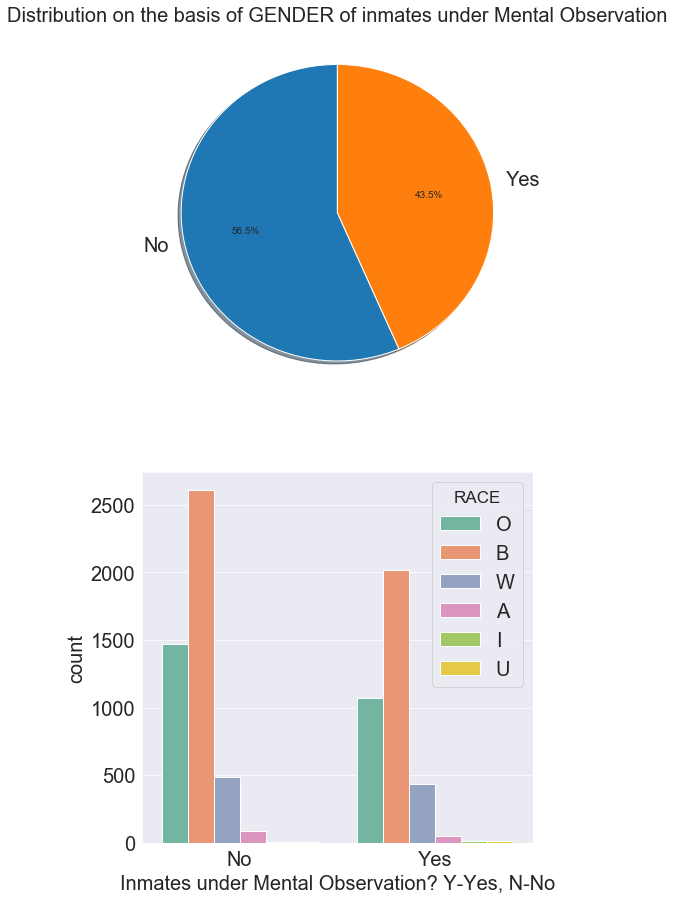

In [152]:
f, ax = plt.subplots(2,1, figsize=(7,15))
#sns.countplot(x='RACE', hue='GENDER', data=data, ax=ax[1][1], palette="Set2")
pie = ax[0].pie(list(inmates_data['BRADH'].value_counts()), 
                   labels=list(inmates_data.BRADH.unique()),
                  autopct='%1.1f%%', shadow=True, startangle=90)
sns.countplot(x='BRADH', hue='RACE', data=inmates_data, palette="Set2",
             order = inmates_data['BRADH'].value_counts().index, ax=ax[1])
ax[0].set_title("Distribution on the basis of GENDER of inmates under Mental Observation")
ax[1].set_xlabel("Inmates under Mental Observation? Y-Yes, N-No")
#ax[1].set_title("RACE")

In [ ]:
axes=plt.boxplot(df["AGE"],vert=False)
pl.title("Boxplot of AGE")
pl.xlabel("AGE ")
plt.show()
#no outliEers are present
#no whiskers present
#hence lower and upper quartile is 0 and 1 respectively
#no values before 0 and after 1
#all values are in the range 0 to 1
data_mean, data_std=np.mean(df.koi_period_err1),np.std(df.koi_period_err1)
cut_off=data_std*3
lower,upper=data_mean-cut_off,data_mean+cut_off
outliers=(x for x in df.koi_period_err1 if x<lower or x>upper)
median=df['koi_period_err1'].median()
mean=df['koi_period_err1'].mean()
for index, row in df.koi_period_err1.iteritems():
    if(row>upper or row<lower):
        df.koi_period_err1.loc[index]= np.mean(df.koi_period_err1)
plt.boxplot(df.koi_period_err1)
plt.show()
